In [45]:
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import config


In [46]:
engine = create_engine(f"postgresql://{config.sql['user']}:{config.sql['pwd']}@{config.sql['host']}/{config.sql['db']}")
connection = engine.connect()


In [47]:
# create query of average salaries and titles

query = """SELECT titles.title, ROUND(AVG(salaries.salary)) AS "Average Salary"
            FROM salaries
            INNER JOIN titles
            ON salaries.emp_no = titles.emp_no
            GROUP BY title
            ORDER BY "Average Salary";"""

In [48]:
# read query

avg_salary = pd.read_sql_query(query, connection)

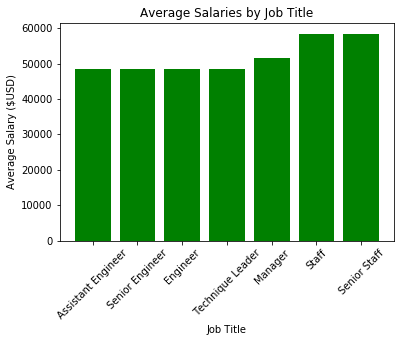

In [49]:
# Create a bar chart of average salary by title.

plt.bar(avg_salary['title'], avg_salary['Average Salary'], color = 'green')

plt.xticks(avg_salary['title'], rotation = 45); #adjust tick placement

# add labels
plt.xlabel("Job Title");
plt.ylabel("Average Salary ($USD)");
plt.title("Average Salaries by Job Title");

plt.savefig("Images/salaries_by_title")

In [50]:
#  find employee informaiton for employee number 499942 


In [51]:
emp_query = """
SELECT employees.emp_no, employees.first_name, employees.last_name, 
titles.title, salaries.salary
FROM employees
INNER JOIN titles
ON employees.emp_no = titles.emp_no
INNER JOIN salaries
ON titles.emp_no = salaries.emp_no
WHERE employees.emp_no = 499942;
"""

In [52]:
# read employee query
employee_info = pd.read_sql_query(emp_query, connection)

employee_info # April Fools Day! 

,emp_no,first_name,last_name,title,salary
0,499942,April,Foolsday,Technique Leader,40000
